In [1]:
# Define a verbose flag (set it to True for verbose output)
#verbose = True
verbose = False

# Set the seed_value (set to None for random seed based on date/time)
seed_value = None
#seed_value = 1703173694627 # Example seed, from log file

# SEt the number of studies to loop over select
study_count = 2

# Set the number of actions to perform on each study
action_count = 20


In [2]:
import os
from selenium import webdriver
from selenium.webdriver.common.by import By  # Import the By module
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException  # Import TimeoutException
from selenium.webdriver.common.keys import Keys
from lorem_text import lorem
import pygetwindow as gw
import random
import time
import keyboard
import logging
from datetime import datetime
import psutil
import matplotlib.pyplot as plt
import time
import threading

In [3]:
# To generate a seed either randomly (e.g., based on date/time) or use a supplied seed_value 
# while also logging the seed used

# Function to generate a seed
def generate_seed(seed_value=None):
    if seed_value is not None:
        seed = seed_value
    else:
        # Generate a seed based on date/time
        seed = int(datetime.now().timestamp() * 1000)  # Use milliseconds for randomness

    iprint ("Selected seed is " + str(seed))
    
    return seed


In [4]:
# Define a function that will be used to wrap informational logging and printing
def iprint (string):

    global verbose  # Declare that we're using the global variable
   
    if (verbose):
        print (string)

    logging.info(string)

In [5]:
# Define a function that will be used to wrap error logging and printing
def eprint (string):

    global verbose  # Declare that we're using the global variable
   
    if (verbose):
        print (string)

    logging.error(string)

In [6]:
def collect_data():
    while collect_data_flag:
        try:
            # Collect system CPU usage and memory usage data
            cpu_percent = psutil.cpu_percent(interval=1)
            mem_percent = psutil.virtual_memory().percent
            #handle_count = psutil.Process(os.getpid()).num_handles
            handle_count = psutil.Process(os.getpid()).num_handles()

            # Collect Chrome's resource usage data
            chrome_mem = collect_chrome_resource_usage()

            # Append data to arrays
            timestamps.append(time.time())
            cpu_usage.append(cpu_percent)
            memory_usage.append(mem_percent)
            handle_usage.append(handle_count)
            chrome_memory_usage.append(chrome_mem)
        except Exception as e:
            print("Error:", str(e))
        time.sleep(1)


In [7]:
# Function to collect Chrome's resource usage data
def collect_chrome_resource_usage():
    chrome_processes = []

    # Iterate through all running processes and filter Chrome processes
    for process in psutil.process_iter(attrs=['pid', 'name']):
        if 'chrome' in process.info['name'].lower():
            chrome_processes.append(process)

    chrome_memory_usage = 0

    # Calculate the total CPU and memory usage of Chrome processes
    for chrome_process in chrome_processes:
        try:
            chrome_memory_usage += chrome_process.memory_info().rss
        except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
            pass

    return chrome_memory_usage

In [8]:
def select_random_study ():

    iprint ("In select_random_study")

    # Randomly select a study
    #study_name = random.choice([r'M1'])
    study_name = random.choice([r'Water Phantom', r'M1', r'CTA Head and Neck', r'PATIENT, FSRT', r'Neptune'] )

    iprint (study_name + " selected")

    # Find and interact with elements in the OHIF Viewer
    
    # Find and click on the a study by its contained text
    study_element = driver.find_element(By.XPATH, f"//span[contains(text(), '{study_name}')]")
    study_element.click()
    
    # Example: Perform actions within the worklist (replace with actual actions)
    # For example, you can search for studies, select a study, and perform actions on it.
    
    # Wait for demonstration purposes
    time.sleep(2)


In [9]:
# Function to perform scrolling based on random parameters
def perform_randomized_scroll(driver):

    iprint ("perform_randomized_scroll selected")
    
    direction = random.choice(["up", "down"])
    num_keys = random.randint(1, 20)
    hold_duration = random.uniform(1, 20)  # Random float between 1 and 10 seconds
  
    # Scroll in the specified direction
    if direction == "up":
        arrow_key = Keys.ARROW_UP
    else:
        arrow_key = Keys.ARROW_DOWN
    
    # Perform scrolling
    for _ in range(num_keys):
        time.sleep (0.1)
        driver.find_element(By.TAG_NAME, 'body').send_keys(arrow_key)


In [10]:
# Function to simulate drawing a Zoom operation
def perform_randomized_zoom(driver):

    iprint ("perform_randomized_zoom selected")

    # Locate the Zoom button by its data-cy attribute
    zoom_button = driver.find_element(By.XPATH, "//button[@data-cy='Zoom']")

    # Click on the length measurement button
    zoom_button.click()

    image_mouse_movement(driver, 30, "Zoom")
    

In [11]:
# Function to simulate drawing a length measurement
def image_mouse_movement(driver, max_distance, selected_tool):
    try:
    
            # Locate the image element by class name
            image_element = driver.find_element(By.CLASS_NAME, "cornerstone-viewport-element")
    
            # Move to the image element
            ActionChains(driver).move_to_element(image_element).perform()
    
            # Limit the random values for move_distance_x and move_distance_y
            move_distance_x = random.randint(-1 * max_distance, max_distance)  # Adjust the range as needed
            move_distance_y = random.randint(-1 * max_distance, max_distance)  # Adjust the range as needed
    
            time.sleep(0.1)
            ActionChains(driver).move_by_offset(move_distance_x, move_distance_y).click_and_hold().perform()

            # Limit the random values for move_distance_x and move_distance_y
            move_distance_x2 = random.randint(-1 * max_distance, max_distance)  # Adjust the range as needed
            move_distance_y2 = random.randint(-1 * max_distance, max_distance)  # Adjust the range as needed
    
            time.sleep(0.1)
            ActionChains(driver).move_by_offset(move_distance_x2, move_distance_y2).click_and_hold().perform()
    
            # Release the left mouse button
            time.sleep(0.1)
                
            ActionChains(driver).release().perform()
    
    except Exception as e:
            eprint("Error:", driver.text)     

In [12]:
# Function to simulate drawing a Pan operation
def perform_randomized_pan(driver):

    iprint ("perform_randomized_pan selected")

    # Locate the Zoom button by its data-cy attribute
    pan_button = driver.find_element(By.XPATH, "//button[@data-cy='Pan']")

    # Click on the length measurement button
    pan_button.click()

    image_mouse_movement(driver, 20, "pan")    


In [13]:
# Function to select a randomized preset
def select_randomized_preset(driver):
    
    iprint("select_randomized_preset selected")

    num_presets = 5 # Hardcoded for now. It's rather challenging to count them.
        
    #try:
    dropdown_parent = driver.find_element(By.XPATH, "//div[@data-cy='WindowLevel-split-button-secondary']")
    time.sleep (1)
    dropdown_parent.click()

    # Wait for dropdown
    time.sleep(1)      

    preset_number = str(random.randint(1, num_presets))  # Generate a random preset number (1 to 5)
    iprint ("preset_number is " + preset_number)
    
    preset_option = driver.find_element(By.XPATH, f"//div[@data-cy='{preset_number}']")

    iprint ("selected_preset is " + preset_option.text)

    # Click on the selected preset option
    try:
        time.sleep(1)    
        preset_option.click()
        #time.sleep(1)    
    except Exception as e:
        eprint(f"Error while clicking on preset: " + preset_option.text)
   
      
    #except Exception as e:
    #    eprint(f"Error while selecting W/L Preset dropdown: " + dropdown_parent.text)


In [14]:
# Function to simulate drawing a Window Level operation
def perform_randomized_window_level(driver):

    iprint ("perform_randomized_window_level selected")

    # Locate the Window Level button by its data-cy attribute
    window_level_button = driver.find_element(By.XPATH, "//button[@data-cy='WindowLevel-split-button-primary']")

    # Click on the length measurement button
    window_level_button.click()

    time.sleep (1)

    image_mouse_movement(driver, 100, "window_level")    


In [15]:
# Function to select a randomized preset
def select_randomized_more_measure_tools(driver):

    iprint("select_randomized_more_measure_tools selected")
    
    global previous_measure_tool  # Declare that we're using the global variable

    # Hardcoded for now. It's rather challenging to get them dynamically
    selectable_tools = ["Length", "ArrowAnnotate", "Bidirectional", "EllipticalROI", "CircleROI"]
    # Remove the previously selected tool from the list if it exists
    if previous_measure_tool in selectable_tools:
        selectable_tools.remove(previous_measure_tool)

    # Select a random tool data-cy value
    selected_tool = random.choice(selectable_tools)

    iprint ("Selected tool is: " + selected_tool)

    # Store the selected tool as the previous tool
    previous_measure_tool = selected_tool
      
    try:
        # Locate the "More Measure Tools" dropdown element by its data-cy attribute
        dropdown_element = driver.find_element(By.XPATH, "//div[@data-cy='MeasurementTools-split-button-secondary']")
    
        # Click on the dropdown to open it
        dropdown_element.click()
    
        # Wait for the dropdown options to become visible
        time.sleep(0.1)
    
        # Locate the tool element by its data-cy attribute
        tool_element = driver.find_element(By.XPATH, f"//div[@data-cy='{selected_tool}']")
        
        # Click on the selected tool
        try:
            tool_element.click()
        except Exception as e:
            # Handle any exceptions here
            eprint(f"An error occurred: " + tool_element.text)
    
        image_mouse_movement(driver, 100, selected_tool)
    
        if (selected_tool == "ArrowAnnotate"):
            
            ActionChains(driver).release().perform()
            iprint ("ArrowAnnotate selected - deal with text entry")
    
            # Test for the presence of the element
            try:

                # Assuming you have located the canvas element
                canvas_element = driver.find_element(By.XPATH, "//canvas[@class='cornerstone-canvas']")

                # Create an ActionChains object and click on the canvas
                actions = ActionChains(driver)
                actions.click(canvas_element).perform()
                
                # Wait for the annotation element to become available
                wait = WebDriverWait(driver, 2)  # Adjust the timeout as needed
                annotation_element = wait.until(EC.presence_of_element_located((By.ID, "draggableItem-dialog-enter-annotation")))
               
                # Enter random Ipsum Lorum text into the input annotation control
                input_annotation = annotation_element.find_element(By.XPATH, "//input[@data-cy='input-annotation']")
                input_annotation.clear()
    
                # Generate a random paragraph of Lorem Ipsum text
                random_lorem_text = lorem.paragraph()
                
                # Send the random text to the input field
                input_annotation.send_keys(random_lorem_text)
    
                # Find and click the "Save" button
                save_button = annotation_element.find_element(By.CSS_SELECTOR, "button[data-cy='Save-btn']")
                save_button.click()
                
            except NoSuchElementException:
                eprint("Element not found.") 
          
        # Check if the message "Track measurements for this series?" is present
        try:
            message_element = WebDriverWait(driver, 1).until(
                EC.presence_of_element_located((By.XPATH, "//div[contains(@class, 'flex grow items-center')]//span[text()='Track measurements for this series?']"))
            )
    
            # If the message is present, try to locate and click the "Yes" button
            try:
                yes_button = WebDriverWait(driver, 1).until(
                    EC.element_to_be_clickable((By.XPATH, "//button[@data-cy='prompt-begin-tracking-yes-btn']"))
                )
                yes_button.click()
                iprint("Message found and 'Yes' button clicked")
            except TimeoutException:
                iprint("Yes button not found or not clickable")
        except TimeoutException:
            if verbose:
                eprint("Message not found or not clickable")   
        
    except Exception as e:
        if (verbose):
            eprint(f"Error while selecting a control: {str(e)}")


In [16]:
# Function to select a randomized preset
def select_randomized_more_tools(driver):

    iprint("select_randomized_more_tools selected")
    
    global previous_more_tool  # Declare that we're using the global variable

    # Hardcoded for now. It's rather challenging to get them dynamically
    selectable_tools = ["flip-horizontal", "rotate-right"]
    # Remove the previously selected tool from the list if it exists
    if previous_more_tool in selectable_tools:
        selectable_tools.remove(previous_more_tool)

    # Select a random tool data-cy value
    selected_tool = random.choice(selectable_tools)

    iprint ("Selected tool is:" + selected_tool)

    # Store the selected tool as the previous tool
    previous_more_tool = selected_tool
      
    try:
        # Locate the "More Measure Tools" dropdown element by its data-cy attribute
        dropdown_element = driver.find_element(By.XPATH, "//div[@data-cy='MoreTools-split-button-secondary']")
    
        # Click on the dropdown to open it
        dropdown_element.click()
    
        # Wait for the dropdown options to become visible
        time.sleep(0.1)
    
        # Locate the tool element by its data-cy attribute
        tool_element = driver.find_element(By.XPATH, f"//div[@data-cy='{selected_tool}']")
        
        # Click on the selected tool
        try:
            tool_element.click()
        except Exception as e:
            # Handle any exceptions here
            eprint(f"An error occurred: " + tool_element.text)
   
    except Exception as e:
        eprint(f"Error while selecting a control: " + dropdown_element.text)


In [17]:
# Main code execution

# Set up the logger
logging.basicConfig(filename=f'log_{datetime.now().strftime("%Y%m%d_%H%M%S")}.log', level=logging.INFO)

In [18]:
# Initialize empty lists to store data
timestamps = []
cpu_usage = []
memory_usage = []
chrome_memory_usage = []
handle_usage = []
collect_data_flag = True  # Flag to control data collection thread

# Create a thread to run the data collection function
data_collection_thread = threading.Thread(target=collect_data)
data_collection_thread.daemon = True
data_collection_thread.start()


In [19]:
# Generate the seed and record it
seed = generate_seed(seed_value)

# Set the seed for random number generation
random.seed(seed)

In [20]:

# Set the path to the ChromeDriver executable as an environment variable
os.environ['webdriver.chrome.driver'] = r'D:\chromedriver-win64\chromedriver.exe'

# Initialize the Chrome web driver
driver = webdriver.Chrome()

# Create ChromeOptions object to configure the driver
chrome_options = webdriver.ChromeOptions()
chrome_options.headless = False  # Set headless mode to False

# Get the Chrome window by its title
chrome_window = gw.getWindowsWithTitle('Google Chrome')[0]  # Adjust the title if needed

# Maximize the Chrome window
chrome_window.maximize()

# Initialize a variable to store the previously selected tool
previous_measure_tool = None
previous_more_tool = None

In [21]:
# Find the Brave window by its title
brave_window = gw.getWindowsWithTitle("Brave")

if brave_window:
    # Minimize the Brave window
    brave_window[0].minimize()
else:
    eprint("Brave window not found")

In [22]:
# Get the current active window
current_window = gw.getActiveWindow()

# Minimize the current window
current_window.minimize()


In [23]:
# Random study selection
for study in range(study_count):  

    # (Re)open OHIF Viewer
    driver.get('https://viewer.ohif.org/')

    # Wait for the OHIF Viewer to load
    time.sleep(2)

    select_random_study ()

    # Open Basic Viewer
    
    #from selenium.webdriver.common.action_chains import ActionChains

    # Locate the button element
    button_element = driver.find_element(By.XPATH, "//button[contains(., 'Basic Viewer')]")
    
    # Create an ActionChains object
    actions = ActionChains(driver)
    
    # Double-click on the button element
    actions.double_click(button_element).perform()
    
    # Wait for demonstration purposes
    time.sleep(2)
    
    # Random operations on the study
    for operation in range(action_count):  # Repeat random actions with random parameters
        iprint ("In loop: " + str(study) + " " + str(operation))
    
        # Randomly select an action
        selected_action = random.choice([perform_randomized_scroll, perform_randomized_zoom, perform_randomized_pan, 
                                         perform_randomized_window_level, select_randomized_preset, 
                                         select_randomized_more_measure_tools, select_randomized_more_tools])
          
        # Call the selected action
        selected_action(driver)
    
        time.sleep(0.1)


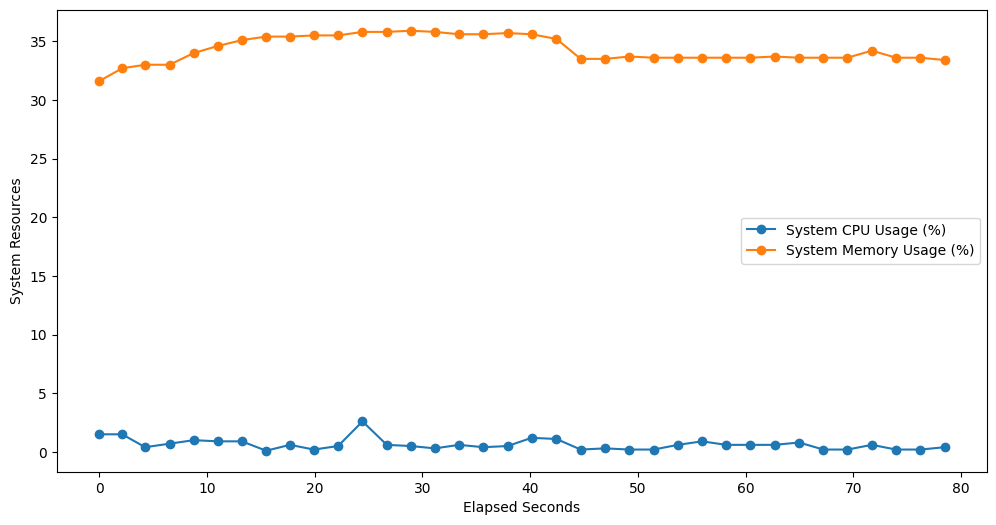

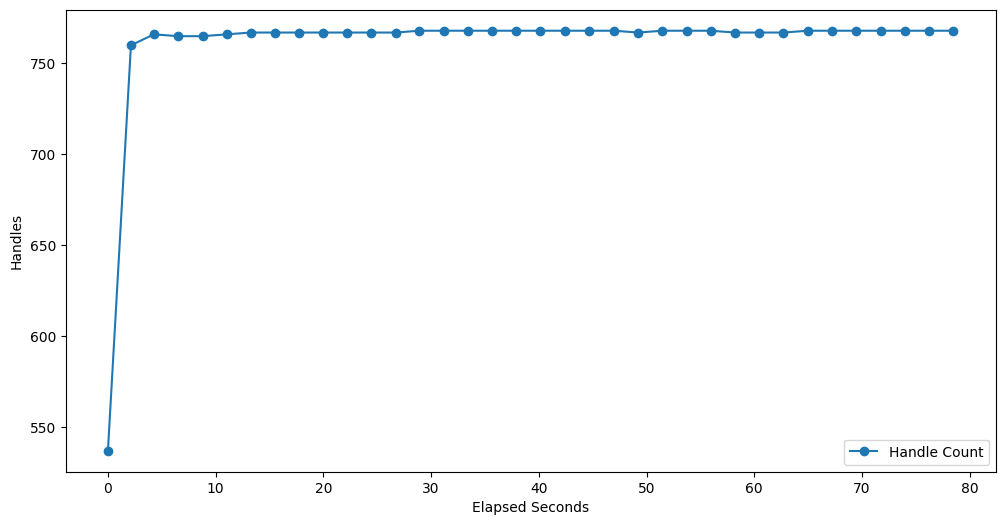

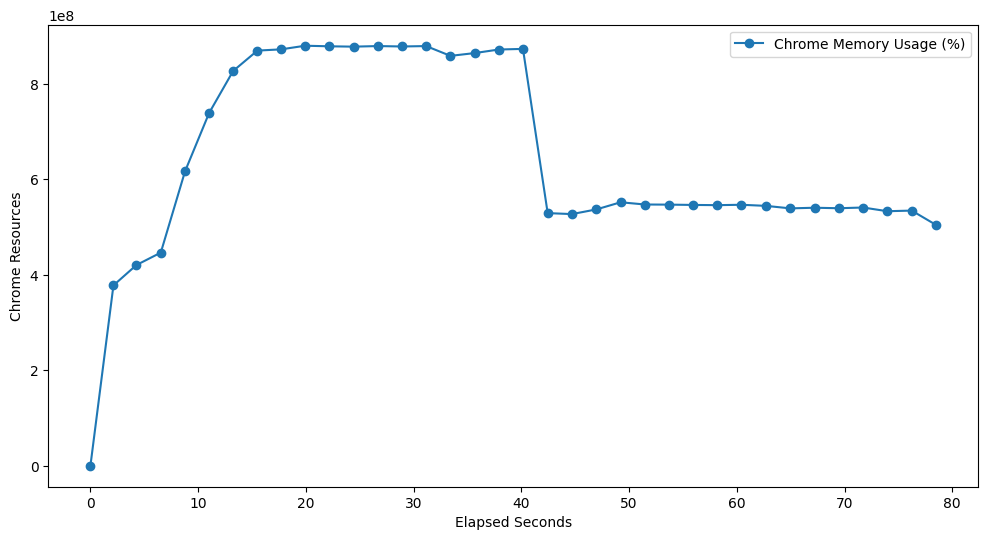

In [24]:
# Stop the data collection thread cleanly
collect_data_flag = False
data_collection_thread.join()  # Wait for the data collection thread to finish

# Calculate elapsed seconds relative to the first timestamp
elapsed_seconds = [(timestamp - timestamps[0]) for timestamp in timestamps]

# Plot the collected System memory and CPU data
plt.figure(figsize=(12, 6))
plt.plot(elapsed_seconds, cpu_usage, label='System CPU Usage (%)', marker='o')
plt.plot(elapsed_seconds, memory_usage, label='System Memory Usage (%)', marker='o')
plt.xlabel('Elapsed Seconds')
plt.ylabel('System Resources')
plt.legend()
plt.show()

# Plot the collected System handle count data
plt.figure(figsize=(12, 6))
plt.plot(elapsed_seconds, handle_usage, label='Handle Count', marker='o')
plt.xlabel('Elapsed Seconds')
plt.ylabel('Handles')
plt.legend()
plt.show()

# Plot the collected Chome data
plt.figure(figsize=(12, 6))
plt.plot(elapsed_seconds, chrome_memory_usage, label='Chrome Memory Usage (%)', marker='o')
plt.xlabel('Elapsed Seconds')
plt.ylabel('Chrome Resources')
plt.legend()
plt.show()